<a href="https://colab.research.google.com/github/Huuco2809/Dongnai_CameraAI/blob/main/train20250822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install --upgrade pip
!pip -q install ultralytics==8.*   # YOLOv8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os, shutil, subprocess, textwrap, sys, pathlib

# === CHỈ SỬA DÒNG NÀY NẾU ĐỔI VỊ TRÍ FILE ===
ARCHIVE_PATH = "/content/drive/MyDrive/00 Quản lý kỹ thuật/Datasets20250821.rar"
EXTRACT_DIR  = "/content/datasets"   # nơi giải nén trong Colab

# chuẩn hoá
ARCHIVE_PATH = ARCHIVE_PATH.replace("\\", "/")
EXTRACT_DIR  = EXTRACT_DIR.replace("\\", "/")

os.makedirs(EXTRACT_DIR, exist_ok=True)

suffix = pathlib.Path(ARCHIVE_PATH).suffix.lower()
if suffix == ".zip":
    !unzip -oq "$ARCHIVE_PATH" -d "$EXTRACT_DIR"
elif suffix == ".rar":
    !apt-get -qq update && apt-get -qq install -y unrar
    !unrar x -o+ "$ARCHIVE_PATH" "$EXTRACT_DIR"
else:
    raise SystemExit(f"Định dạng không hỗ trợ: {suffix}. Hãy nén thành .zip hoặc .rar")

# hiển thị cấu trúc sau khi giải nén
print("== Thư mục sau khi giải nén ==")
!find "$EXTRACT_DIR" -maxdepth 2 -type d -print

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  /content/datasets/Datasets20250821/train/images/cong_nha_may_1755770425_34716_jpg.rf.891a41ebe75f10f3549f543a10a8eee2.jpg      32%  OK 
Extracting  /content/datasets/Datasets20250821/train/images/cong_nha_may_1755770425_34717_jpg.rf.be135ebf99fc61c24d224e9562d9b046.jpg      32%  OK 
Extracting  /content/datasets/Datasets20250821/train/images/cong_nha_may_1755770425_34720_jpg.rf.3464d3c30b85b5b8f2932d379181ec56.jpg      32%  OK 
Extracting  /content/datasets/Datasets20250821/train/images/cong_nha_may_1755770425_34721_jpg.rf.edbdbaa0a167147bddbdea830db7491b.jpg      32%  OK 
Extracting  /content/datasets/Datasets20250821/train/images/cong_nha_may_1755770425_34722_jpg.rf.ffa14675c2df44eea7c261976d5dc595.jpg      32%  OK 
Extracting  /content/datasets/Datasets20250821/train/images/cong_nha_may_1755770425_34725_jpg.rf.bb70a39f7f23614ea42089b85c50fc66.jpg      32%  OK 
E

In [7]:
from pathlib import Path

root = Path(EXTRACT_DIR)
data_yaml = list(root.rglob("data.yaml"))
if not data_yaml:
    raise SystemExit("❌ Không tìm thấy data.yaml trong gói dữ liệu. Kiểm tra lại zip/rar.")
DATA_YAML = str(data_yaml[0])
print("data.yaml:", DATA_YAML)

# kiểm tra tối thiểu
for split in ["train", "valid", "test"]:
    d = list(root.rglob(f"{split}/images"))
    print(f"{split}/images:", d[0] if d else "⚠️ không thấy (không bắt buộc phải có test)")


data.yaml: /content/datasets/Datasets20250821/data.yaml
train/images: /content/datasets/Datasets20250821/train/images
valid/images: /content/datasets/Datasets20250821/valid/images
test/images: /content/datasets/Datasets20250821/test/images


In [8]:
from ultralytics import YOLO

MODEL = "yolov8n.pt"   # có thể đổi 'yolov8s.pt'
EPOCHS = 50
IMGSZ  = 640
BATCH  = 16            # nếu OOM: giảm 16→8→4

model = YOLO(MODEL)
results = model.train(
    data=DATA_YAML,
    epochs=EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    verbose=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Datasets20250821/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3499.2±1152.7 MB/s, size: 261.2 KB)


train: Scanning /content/datasets/Datasets20250821/train/labels... 2196 images, 592 backgrounds, 0 corrupt: 100%|██████████| 2196/2196 [00:00<00:00, 2431.22it/s]


train: New cache created: /content/datasets/Datasets20250821/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1887.4±1246.5 MB/s, size: 255.0 KB)


val: Scanning /content/datasets/Datasets20250821/valid/labels... 626 images, 169 backgrounds, 0 corrupt: 100%|██████████| 626/626 [00:00<00:00, 1161.33it/s]

val: New cache created: /content/datasets/Datasets20250821/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.11G     0.9402      2.253      0.898          6        640: 100%|██████████| 138/138 [00:47<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        626        606      0.981      0.731      0.737      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.23G      0.803      1.188     0.8909          6        640: 100%|██████████| 138/138 [00:45<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.01it/s]


                   all        626        606      0.982       0.74      0.738      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G     0.7875     0.8923     0.8936         11        640: 100%|██████████| 138/138 [00:46<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.26it/s]

                   all        626        606      0.976      0.741      0.739      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G     0.7513     0.6915     0.8831          6        640: 100%|██████████| 138/138 [00:44<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]


                   all        626        606      0.981      0.737       0.74      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.27G     0.7097     0.5816     0.8724          7        640: 100%|██████████| 138/138 [00:44<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]

                   all        626        606      0.981      0.743      0.739      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.3G     0.6914     0.5306     0.8762          7        640: 100%|██████████| 138/138 [00:44<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]


                   all        626        606      0.974      0.743       0.74      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G     0.6856     0.4955     0.8689          8        640: 100%|██████████| 138/138 [00:44<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.98it/s]

                   all        626        606      0.982      0.744      0.742      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G     0.6398     0.4516     0.8615          6        640: 100%|██████████| 138/138 [00:44<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]

                   all        626        606      0.982      0.743      0.755      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.34G     0.6424      0.446     0.8584         11        640: 100%|██████████| 138/138 [00:45<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.99it/s]


                   all        626        606      0.981      0.742      0.757      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.37G     0.6286     0.4294     0.8552          7        640: 100%|██████████| 138/138 [00:45<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.59it/s]

                   all        626        606      0.981      0.745      0.749      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G     0.6309     0.4285     0.8587          9        640: 100%|██████████| 138/138 [00:44<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]

                   all        626        606      0.982      0.747      0.748      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.4G        0.6     0.4009     0.8516          2        640: 100%|██████████| 138/138 [00:44<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.06it/s]

                   all        626        606      0.981      0.745      0.754      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.41G     0.6033     0.4079     0.8557          4        640: 100%|██████████| 138/138 [00:44<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]

                   all        626        606      0.984      0.744      0.774      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.44G     0.6022     0.3994     0.8542          7        640: 100%|██████████| 138/138 [00:45<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.96it/s]

                   all        626        606      0.984      0.746      0.747      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.45G     0.5733     0.3794     0.8451         12        640: 100%|██████████| 138/138 [00:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]

                   all        626        606      0.983      0.746      0.788      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.47G     0.5669     0.3716     0.8446          6        640: 100%|██████████| 138/138 [00:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]

                   all        626        606      0.983      0.744       0.78       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.48G     0.5691     0.3715     0.8389         11        640: 100%|██████████| 138/138 [00:43<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]

                   all        626        606      0.983      0.744      0.864      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.51G     0.5704     0.3649     0.8374          9        640: 100%|██████████| 138/138 [00:43<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.10it/s]

                   all        626        606      0.982      0.744       0.76      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.51G     0.5552     0.3609     0.8413          4        640: 100%|██████████| 138/138 [00:43<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]

                   all        626        606      0.983      0.743      0.801      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.54G      0.548      0.355     0.8372          7        640: 100%|██████████| 138/138 [00:45<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]

                   all        626        606      0.981      0.742      0.745       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.55G     0.5501     0.3561     0.8422          7        640: 100%|██████████| 138/138 [00:44<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]

                   all        626        606      0.982      0.745      0.821      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.57G     0.5319     0.3385     0.8342          9        640: 100%|██████████| 138/138 [00:45<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.18it/s]

                   all        626        606       0.98      0.743      0.788      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.58G     0.5351     0.3459      0.837          4        640: 100%|██████████| 138/138 [00:46<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]

                   all        626        606      0.982      0.743       0.77      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.61G     0.5269      0.334     0.8327          2        640: 100%|██████████| 138/138 [00:44<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]

                   all        626        606      0.981      0.745      0.766      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.62G     0.5184     0.3287     0.8294          6        640: 100%|██████████| 138/138 [00:46<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.79it/s]

                   all        626        606      0.981      0.746      0.753       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.64G     0.5087     0.3273       0.83          6        640: 100%|██████████| 138/138 [00:46<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]

                   all        626        606      0.981      0.741      0.759      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.65G     0.5039     0.3244     0.8263         13        640: 100%|██████████| 138/138 [00:45<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]

                   all        626        606      0.983      0.743      0.774      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.67G     0.4873     0.3166     0.8228          1        640: 100%|██████████| 138/138 [00:45<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.92it/s]

                   all        626        606      0.984      0.746      0.757      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.68G     0.4927     0.3172     0.8268          4        640: 100%|██████████| 138/138 [00:45<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.22it/s]

                   all        626        606      0.982      0.746      0.749      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.71G     0.4873     0.3131     0.8261         10        640: 100%|██████████| 138/138 [00:44<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.50it/s]

                   all        626        606      0.981      0.747      0.767      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.72G     0.4757     0.3048     0.8193          3        640: 100%|██████████| 138/138 [00:45<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]

                   all        626        606      0.966      0.744      0.791       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.74G     0.4764     0.2973       0.82         13        640: 100%|██████████| 138/138 [00:45<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]

                   all        626        606      0.983      0.744      0.746      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.75G     0.4739     0.2995     0.8234          6        640: 100%|██████████| 138/138 [00:45<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]

                   all        626        606      0.982      0.744      0.757      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.78G     0.4817     0.2954     0.8204          8        640: 100%|██████████| 138/138 [00:46<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]

                   all        626        606      0.982      0.744      0.753      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.79G     0.4759     0.3025     0.8182          6        640: 100%|██████████| 138/138 [00:45<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]

                   all        626        606      0.982      0.744      0.751      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.81G     0.4648     0.2935     0.8217          2        640: 100%|██████████| 138/138 [00:47<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]

                   all        626        606       0.97      0.747       0.79      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.82G     0.4576     0.2949     0.8254          9        640: 100%|██████████| 138/138 [00:46<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.80it/s]

                   all        626        606      0.983      0.744      0.762      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.85G      0.443     0.2842     0.8142         10        640: 100%|██████████| 138/138 [00:46<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]

                   all        626        606      0.983      0.744      0.764      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.86G     0.4402     0.2781     0.8137          9        640: 100%|██████████| 138/138 [00:45<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.12it/s]

                   all        626        606       0.98      0.746      0.752      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.88G     0.4412       0.28     0.8164          7        640: 100%|██████████| 138/138 [00:45<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.92it/s]

                   all        626        606      0.983      0.744      0.758      0.693


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.89G     0.4324     0.2766     0.8156          4        640: 100%|██████████| 138/138 [00:46<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]

                   all        626        606       0.98      0.747       0.76      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.91G     0.4246     0.2693     0.8041          7        640: 100%|██████████| 138/138 [00:44<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]

                   all        626        606       0.98      0.747      0.754      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.92G     0.4161     0.2628       0.81          4        640: 100%|██████████| 138/138 [00:44<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.57it/s]

                   all        626        606      0.983      0.746      0.751       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.95G     0.4062     0.2606     0.8054          4        640: 100%|██████████| 138/138 [00:44<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]

                   all        626        606      0.983      0.746      0.745      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.96G     0.3962     0.2515     0.8101          6        640: 100%|██████████| 138/138 [00:43<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]

                   all        626        606      0.981      0.747      0.746      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.98G     0.4006     0.2557      0.804          4        640: 100%|██████████| 138/138 [00:43<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]

                   all        626        606      0.981      0.743      0.749       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.99G     0.3908     0.2456     0.8057          3        640: 100%|██████████| 138/138 [00:45<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

                   all        626        606      0.981      0.746      0.749      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.02G     0.3806     0.2429     0.7961          3        640: 100%|██████████| 138/138 [00:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]

                   all        626        606      0.982      0.745       0.75      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.02G     0.3845     0.2397     0.8012          2        640: 100%|██████████| 138/138 [00:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.18it/s]

                   all        626        606       0.98      0.747      0.749      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.05G     0.3756     0.2342     0.8047          4        640: 100%|██████████| 138/138 [00:44<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]

                   all        626        606      0.983      0.744      0.751      0.692



50 epochs completed in 0.717 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.13it/s]


                   all        626        606      0.983      0.744      0.864      0.718
               bicycle          1          1          1          0      0.497      0.298
                   car        294        294      0.996          1      0.995      0.909
             motorbike        154        154      0.974      0.987       0.99      0.837
                person        157        157      0.961      0.987      0.973      0.828
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


RUN DIR: runs/detect/train
total 8828
drwxr-xr-x 3 root root   4096 Aug 18 17:03 .
drwxr-xr-x 3 root root   4096 Aug 18 16:51 ..
-rw-r--r-- 1 root root   1527 Aug 18 16:51 args.yaml
-rw-r--r-- 1 root root 156939 Aug 18 17:03 BoxF1_curve.png
-rw-r--r-- 1 root root 121327 Aug 18 17:03 BoxP_curve.png
-rw-r--r-- 1 root root  85403 Aug 18 17:03 BoxPR_curve.png
-rw-r--r-- 1 root root 137303 Aug 18 17:03 BoxR_curve.png
-rw-r--r-- 1 root root 105001 Aug 18 17:03 confusion_matrix_normalized.png
-rw-r--r-- 1 root root  91440 Aug 18 17:03 confusion_matrix.png
-rw-r--r-- 1 root root 163809 Aug 18 16:51 labels_correlogram.jpg
-rw-r--r-- 1 root root  96839 Aug 18 16:51 labels.jpg
-rw-r--r-- 1 root root   6402 Aug 18 17:03 results.csv
-rw-r--r-- 1 root root 306768 Aug 18 17:03 results.png
-rw-r--r-- 1 root root 689845 Aug 18 16:51 train_batch0.jpg
-rw-r--r-- 1 root root 573377 Aug 18 17:01 train_batch1640.jpg
-rw-r--r-- 1 root root 550520 Aug 18 17:01 train_batch1641.jpg
-rw-r--r-- 1 root root 567433

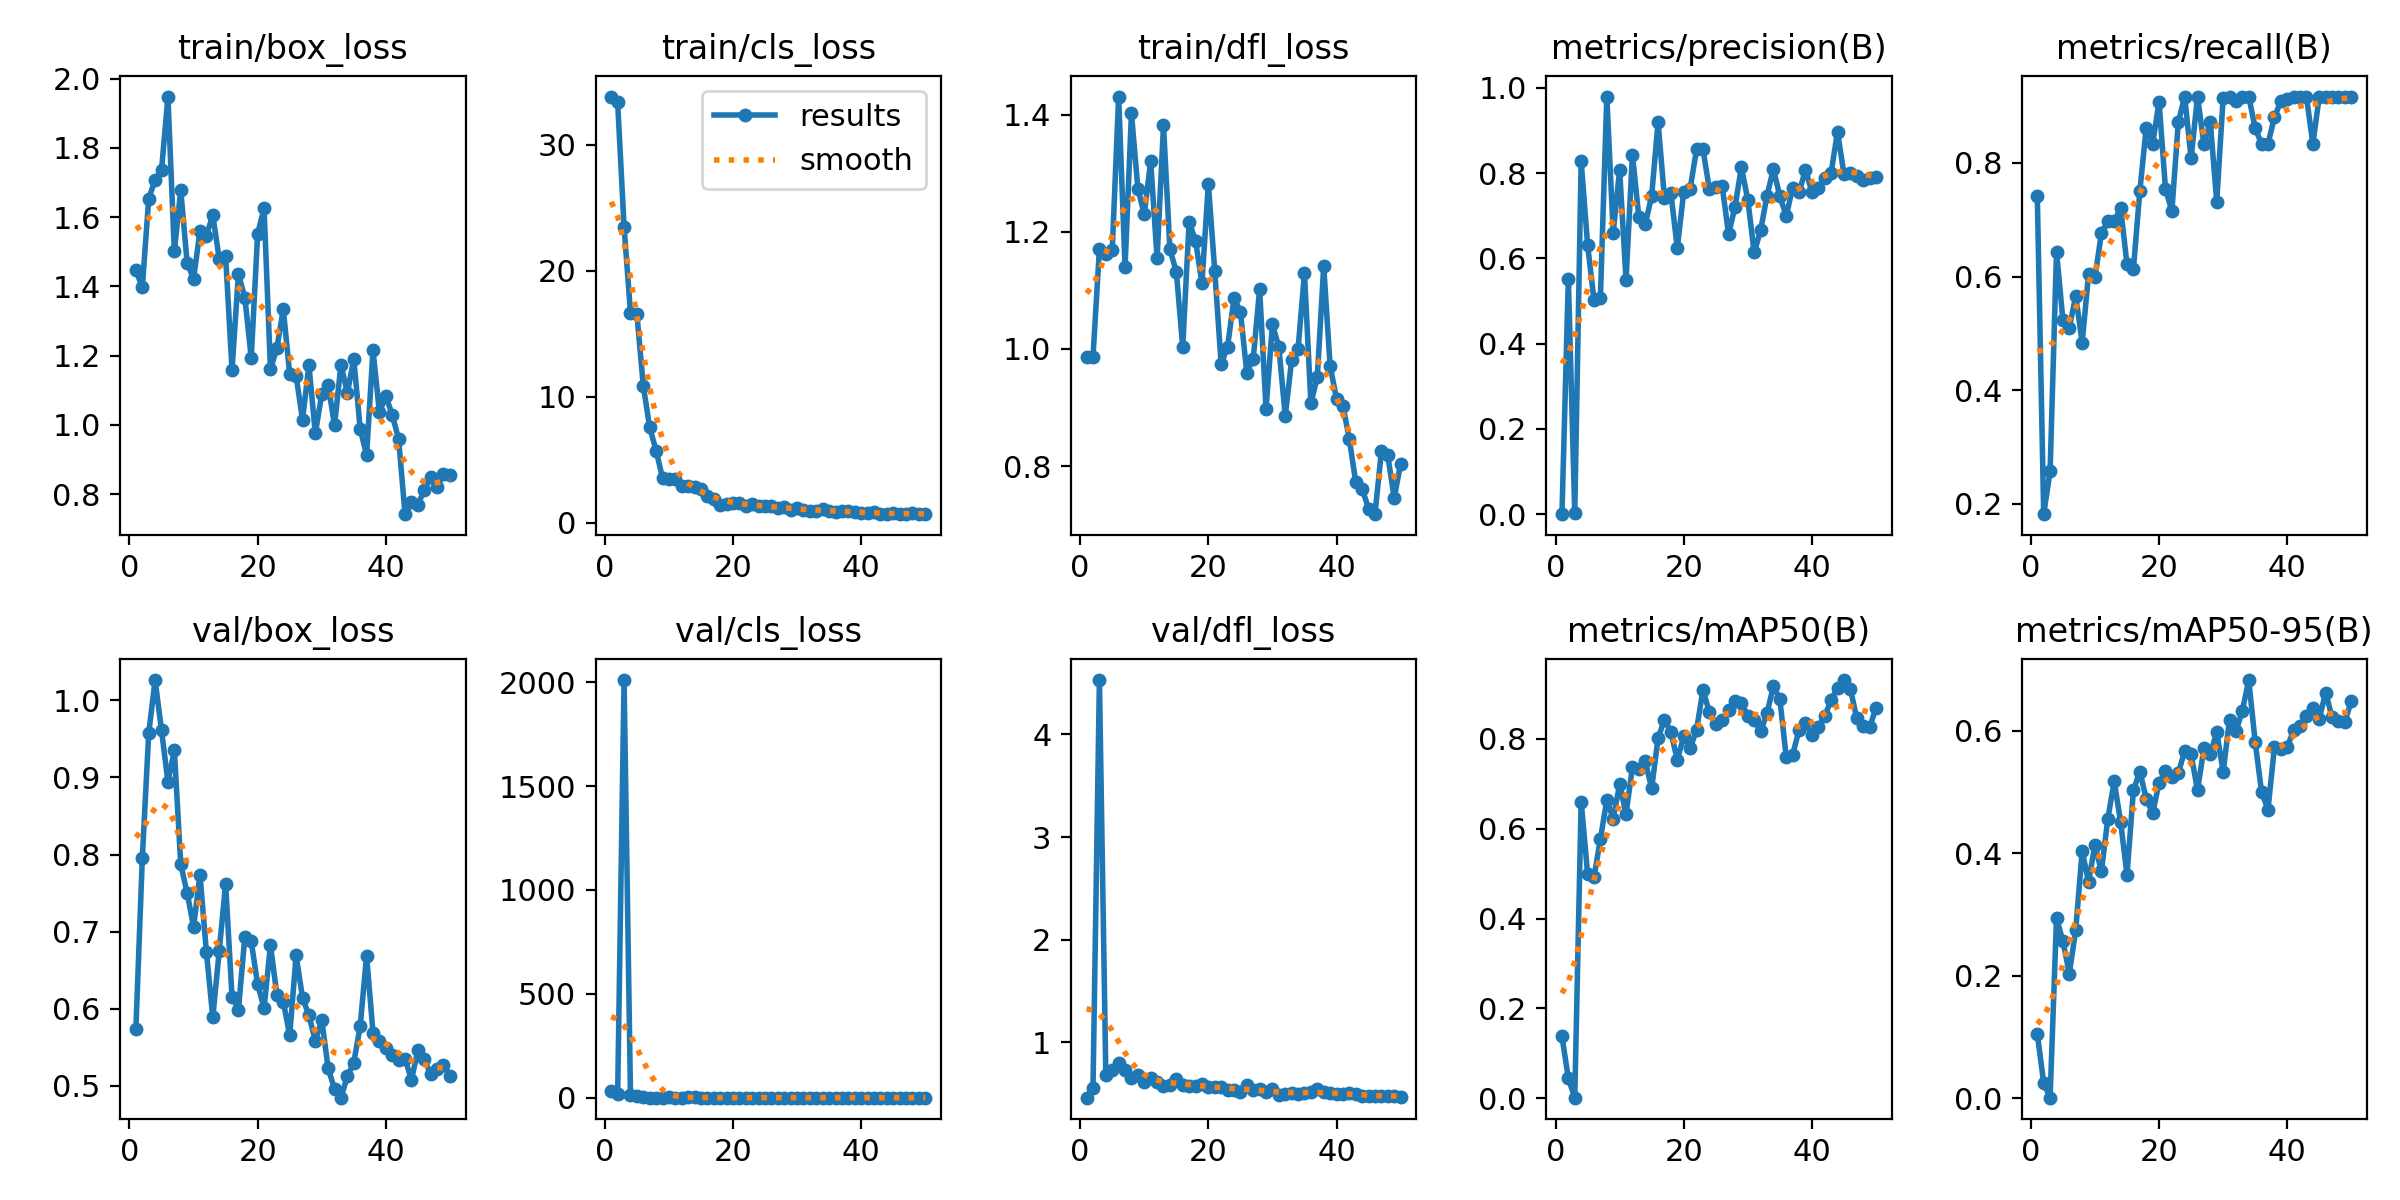

In [ ]:
import glob
run_dir = sorted(glob.glob("runs/detect/train*"))[-1]
print("RUN DIR:", run_dir)
!ls -la "$run_dir"
from IPython.display import Image, display
display(Image(filename=f"{run_dir}/results.png"))


In [9]:
best_ckpt = f"{run_dir}/weights/best.pt"
model = YOLO(best_ckpt)

# đổi source nếu cần: thư mục ảnh của bạn
source = str(Path(EXTRACT_DIR)/"test"/"images")
pred = model.predict(source=source, conf=0.25, save=True)

import glob
pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]
print("PRED DIR:", pred_dir)
!ls -la "$pred_dir"


NameError: name 'run_dir' is not defined

In [ ]:
OUT_DIR = "/content/drive/MyDrive/yolo_models/dongnai_v1"
os.makedirs(OUT_DIR, exist_ok=True)
!cp -v "$run_dir/weights/best.pt" "$OUT_DIR/best.pt"
!cp -v "$run_dir/weights/last.pt" "$OUT_DIR/last.pt"
print("✅ Đã lưu vào:", OUT_DIR)


'runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/yolo_models/dongnai_v1/best.pt'
'runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/yolo_models/dongnai_v1/last.pt'
✅ Đã lưu vào: /content/drive/MyDrive/yolo_models/dongnai_v1
